📊 데이터 컬럼 설명 (Dataset Description)

본 데이터셋은 중고차의 제원 및 상태 정보를 기반으로 차량 가격(price)을 예측하기 위한 데이터이다.
각 행(row)은 하나의 차량을 의미하며, 총 188,533개 샘플과 13개 변수로 구성되어 있다.

🔑 식별자 컬럼
컬럼명	설명
id	각 차량을 구분하기 위한 고유 식별자(ID)
🎯 Target 변수
컬럼명	설명
price	차량의 판매 가격 (목표 변수, 단위: USD)
🔢 수치형 변수 (Numerical Features)
컬럼명	설명
model_year	차량의 연식(출고 연도)
milage	차량의 누적 주행 거리
price	차량 가격 (Target 변수)

model_year와 milage는 차량의 감가상각 및 사용 정도를 반영하는 핵심 변수이다.

🏷️ 범주형 변수 (Categorical Features)
컬럼명	설명
brand	차량 제조사 (예: Toyota, BMW, Mercedes-Benz 등)
model	차량 모델명
fuel_type	연료 유형 (Gasoline, Diesel, Hybrid, Electric 등)
engine	엔진 사양 정보 (배기량, 실린더 수, 출력 등 포함된 문자열)
transmission	변속기 유형 (Automatic, Manual, Dual Shift 등)
ext_col	차량 외관 색상
int_col	차량 내부 색상
accident	사고 또는 손상 이력 여부
clean_title	차량의 타이틀(소유권) 상태가 깨끗한지 여부
⚠️ 결측치 관련 컬럼

일부 범주형 변수는 결측치를 포함하고 있으며, 이는 차량 정보 제공 여부 또는 기록 누락을 의미할 수 있다.

컬럼명	설명
fuel_type	연료 정보가 제공되지 않은 차량 존재
accident	사고 이력 정보가 누락된 차량 존재
clean_title	타이틀 정보가 제공되지 않은 차량 존재

해당 결측치는 단순 누락이 아닌 정보 비공개 또는 미확인 상태를 의미할 가능성이 있어 전처리 시 별도 고려가 필요하다.

In [29]:
import os
import time
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\train.csv')
test = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\test.csv')
sample = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\sample_submission.csv')

print(f"Train 데이터 크기:", (train.shape))
print(f"Test 데이터 크기:", (test.shape))

Train 데이터 크기: (188533, 13)
Test 데이터 크기: (125690, 12)


In [31]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [53]:
top10 = train.sort_values("price", ascending=False).head(20)
display(top10)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
14693,14693,Hyundai,Santa Fe SEL,2022,13865,Gasoline,2.5L I4 16V PDI DOHC,8-Speed Automatic,Black,Black,None reported,Yes,2954083
1880,1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
65043,65043,Mercedes-Benz,AMG GLE AMG GLE 63 S-Model 4MATIC,2017,4590,Gasoline,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,2954083
103061,103061,RAM,1500 Classic Warlock,2019,36757,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Diesel Gray / Black,None reported,Yes,2954083
59650,59650,Toyota,Highlander XLE,2022,13566,Gasoline,2.4L I4 16V PDI DOHC Turbo,8-Speed Automatic,Ruby Flare Pearl,Black,None reported,NaN,2954083
72448,72448,Mercedes-Benz,SL-Class SL550 Roadster,2001,113500,Gasoline,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Red,Black,None reported,Yes,2954083
103189,103189,Dodge,Ram 2500 Laramie Quad Cab,2005,27600,Diesel,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,4-Speed A/T,Red,Gray,None reported,Yes,2954083
80269,80269,GMC,Sierra 1500 SLE1 Extended Cab,2020,2750,Gasoline,5.3L V8 16V GDI OHV,6-Speed Automatic,Red,Black,None reported,Yes,2954083
119162,119162,Ford,Bronco Raptor,2023,4285,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,10-Speed Automatic,Oxford White,Black,None reported,NaN,2954083
172766,172766,Lexus,SC 430 Base,2004,89500,Gasoline,300.0HP 4.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,2954083


In [62]:
import numpy as np
import pandas as pd

vc = train["price"].value_counts()
hi_thr = train["price"].quantile(0.999)   # 상위 0.1%부터 의심 구간
spike_values = vc[(vc.index >= hi_thr) & (vc >= 20)].index.tolist()

print("hi_thr(0.999):", hi_thr)
print("spike_values:", spike_values)
display(vc.loc[spike_values])

# 스파이크 값이 어떤 차에 붙어있는지 샘플로 보기
cols = ["id","brand","model","model_year","milage","engine","transmission","price"]
for v in spike_values:
    print("\n==== price =", v, "count =", (train["price"]==v).sum(), "====")
    display(train.loc[train["price"]==v, cols].head(10))


hi_thr(0.999): 749950.0
spike_values: [1599000, 2954083, 749950, 1950995]


price
1599000    51
2954083    50
749950     48
1950995    47
Name: count, dtype: int64


==== price = 1599000 count = 51 ====


,id,brand,model,model_year,milage,engine,transmission,price
4164,4164,Rolls-Royce,Ghost Base,2016,38800,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,1599000
15101,15101,Porsche,911 Carrera S,2015,7800,400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,1599000
16417,16417,Bentley,Bentayga Speed,2020,2165,6.0L W12 48V PDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,1599000
17859,17859,Land,Rover Range Rover Sport HSE,2019,5844,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1599000
18614,18614,Lamborghini,Huracan LP580-2,2017,22000,573.0HP 5.2L 10 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1599000
19118,19118,BMW,M4 Base,2019,18000,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,1599000
19379,19379,Tesla,Model X Performance,2023,159,778.0HP Electric Motor Electric Fuel System,A/T,1599000
27807,27807,Land,Rover Range Rover P530 SE LWB 7 Seat,2023,1538,523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,1599000
32219,32219,Porsche,911 GT3,2018,9712,4.0L H6 24V GDI DOHC,7-Speed Automatic with Auto-Shift,1599000
32389,32389,Land,Rover Range Rover Sport SVR Carbon Edition,2022,19250,575.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,1599000



==== price = 2954083 count = 50 ====


,id,brand,model,model_year,milage,engine,transmission,price
220,220,Ford,F-150 XLT,2021,26315,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,2954083
1880,1880,Chrysler,300C Base,2003,55900,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,2954083
13838,13838,Toyota,Highlander SE,2014,85000,3.5L V6 24V PDI DOHC,8-Speed Automatic,2954083
14693,14693,Hyundai,Santa Fe SEL,2022,13865,2.5L I4 16V PDI DOHC,8-Speed Automatic,2954083
16034,16034,Mercedes-Benz,SL-Class SL500 Roadster,2005,34068,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,2954083
18946,18946,Audi,S4 Base,2004,73500,340.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,2954083
21814,21814,RAM,1500 Laramie,2022,16156,5.7L V8 16V MPFI OHV,8-Speed Automatic,2954083
36615,36615,Ford,Excursion Limited Ultimate,2002,89900,325.0HP 6.0L 8 Cylinder Engine Diesel Fuel,5-Speed A/T,2954083
42177,42177,Ford,Mustang GT,2005,82000,300.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,5-Speed M/T,2954083
42219,42219,Land,Rover Range Rover 3.0L V6 Supercharged HSE,2021,29850,380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,2954083



==== price = 749950 count = 48 ====


,id,brand,model,model_year,milage,engine,transmission,price
5715,5715,Audi,R8 5.2 V10 performance,2019,82978,602.0HP 5.2L 10 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,749950
8595,8595,Lamborghini,Huracan EVO Base,2020,6987,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,749950
17667,17667,Lamborghini,Urus Base,2021,15109,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,749950
18715,18715,Porsche,911 GT3,2021,1897,4.0L H6 24V GDI DOHC,8-Speed Automatic,749950
21741,21741,Mercedes-Benz,C-Class C 300 4MATIC,2023,2121,255.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,9-Speed A/T,749950
34341,34341,Chevrolet,Tahoe RST,2023,15175,5.3L V8 16V GDI OHV,10-Speed Automatic,749950
37439,37439,Bentley,Bentayga S,2022,2600,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,749950
41876,41876,Bentley,Bentayga Azure First Edition,2020,1871,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,749950
49122,49122,Ford,Expedition Max King Ranch,2021,2425,3.5L V6 24V PDI DOHC Twin Turbo Hybrid,10-Speed Automatic,749950
59676,59676,Mercedes-Benz,AMG GLE AMG GLE 63 S-Model 4MATIC,2018,40000,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,749950



==== price = 1950995 count = 47 ====


,id,brand,model,model_year,milage,engine,transmission,price
2964,2964,Porsche,911 R,2023,714,4.0L H6 24V GDI DOHC,6-Speed Manual,1950995
8789,8789,Lamborghini,Gallardo LP570-4 Superleggera,2011,3254,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,1950995
10173,10173,Mercedes-Benz,AMG GLS 63 4MATIC,2019,4102,603.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,1950995
21523,21523,BMW,M3 CS,2018,7500,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,1950995
31429,31429,Chevrolet,Corvette Base,2002,15443,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,1950995
32645,32645,Bentley,Continental GT Speed,2016,27981,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic,1950995
32903,32903,Bentley,Continental GTC Base,2012,18000,552.0HP 6.0L 12 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,1950995
34801,34801,Mercedes-Benz,SL-Class SL550 Roadster,2004,13250,382.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,A/T,1950995
35218,35218,Chevrolet,Corvette Base,2010,34500,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,1950995
36231,36231,Ford,F-250 Lariat,2018,47850,475.0HP 6.7L 8 Cylinder Engine Diesel Fuel,A/T,1950995


In [63]:
# 최저가/하위 20개
print("min price:", train["price"].min())

cols = ["id","brand","model","model_year","milage","fuel_type","engine","transmission","accident","clean_title","price"]
display(train.sort_values("price", ascending=True)[cols].head(20))


min price: 2000


,id,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
42348,42348,Pontiac,Firebird Base,1999,158000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,Yes,2000
81089,81089,Chevrolet,Corvette Base,2001,199000,Gasoline,300.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,Yes,2000
143210,143210,Land,Rover Range Rover HSE,2003,49500,Gasoline,230.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,A/T,None reported,Yes,2000
135298,135298,Jaguar,XK8 Base,1999,50000,Gasoline,290.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,None reported,Yes,2000
38975,38975,Mazda,MX-5 Miata Base,1999,150000,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,Yes,2000
179173,179173,INFINITI,QX60 Base,2010,117200,Gasoline,265.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,2000
152120,152120,Lexus,RX 330 Base,2002,178000,Gasoline,230.0HP 3.3L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,2000
38172,38172,Chevrolet,Corvette Base,2008,130000,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,None reported,Yes,2000
114798,114798,Honda,Prelude Type SH,2001,170000,Gasoline,210.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,Yes,2000
11146,11146,Chevrolet,Monte Carlo SS,2001,64776,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,4-Speed A/T,None reported,Yes,2000


In [64]:
vc = train["price"].value_counts().sort_index()  # 가격 오름차순 인덱스 정렬
display(vc.head(50))  # 가장 낮은 가격들 빈도

# 하위 구간(예: 1만 이하)에서 많이 반복되는 값 찾기
low_threshold = 10000
spike_low = vc[(vc.index <= low_threshold) & (vc >= 20)]  # 1만 이하인데 20번 이상 반복
print("low spikes (<=10,000 & count>=20):")
display(spike_low)


price
2000     56
2300     73
2500    177
2800     40
2899     25
2900     38
2990     23
3000    191
3200     99
3499     44
3500    229
3550     42
3600     39
3750     32
3850    155
3900     80
3950     77
3990     37
3995     52
3999     52
4000    419
4100     43
4199     40
4200    252
4300    151
4399     41
4400     48
4495     44
4500    424
4700     99
4750     48
4800     97
4900    197
4995     49
4999    136
5000    524
5100     35
5199     42
5200     95
5230     35
5499     35
5500    577
5699     35
5700    124
5750     93
5800    204
5899     44
5900    240
5949     35
5990     46
Name: count, dtype: int64

low spikes (<=10,000 & count>=20):


price
2000      56
2300      73
2500     177
2800      40
2899      25
        ... 
9985      59
9995     395
9998      36
9999     391
10000    903
Name: count, Length: 137, dtype: int64

In [66]:
import numpy as np
import pandas as pd

q001 = train["price"].quantile(0.001)
q005 = train["price"].quantile(0.005)

low001 = train[train["price"] <= q001].copy()
low005 = train[train["price"] <= q005].copy()

cols_num = ["model_year", "milage", "price"]
for name, df in [("low0.1%", low001), ("low0.5%", low005), ("all", train)]:
    print(f"\n[{name}] n={len(df)}")
    display(df[cols_num].describe().T)



[low0.1%] n=306


,count,mean,std,min,25%,50%,75%,max
model_year,306.0,2005.045752,4.392004,1993.0,2001.00,2005.0,2008.0,2015.0
milage,306.0,142154.715686,54686.396754,1750.0,109517.75,146900.0,170000.0,271000.0
price,306.0,2360.784314,189.817961,2000.0,2300.00,2500.0,2500.0,2500.0



[low0.5%] n=995


,count,mean,std,min,25%,50%,75%,max
model_year,995.0,2006.292462,5.063966,1993.0,2003.0,2006.0,2010.0,2023.0
milage,995.0,136625.061307,53215.544893,1235.0,106000.0,137000.0,170000.0,285000.0
price,995.0,2945.830151,456.898463,2000.0,2500.0,3000.0,3499.0,3500.0



[all] n=188533


,count,mean,std,min,25%,50%,75%,max
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [67]:
def rate_table(df, col):
    s = df[col].fillna("NaN").astype(str)
    return (s.value_counts(normalize=True)*100).round(2)

print("accident % (low0.1%)")
display(rate_table(low001, "accident"))

print("clean_title % (low0.1%)")
display(rate_table(low001, "clean_title"))

print("accident % (all)")
display(rate_table(train, "accident"))

print("clean_title % (all)")
display(rate_table(train, "clean_title"))


accident % (low0.1%)


accident
None reported                             55.56
At least 1 accident or damage reported    43.79
NaN                                        0.65
Name: proportion, dtype: float64

clean_title % (low0.1%)


clean_title
Yes    99.35
NaN     0.65
Name: proportion, dtype: float64

accident % (all)


accident
None reported                             76.65
At least 1 accident or damage reported    22.05
NaN                                        1.30
Name: proportion, dtype: float64

clean_title % (all)


clean_title
Yes    88.64
NaN    11.36
Name: proportion, dtype: float64

In [68]:
# "설명 안 되는 저가" 예시 규칙: 최근 연식인데 저가
low_cut = train["price"].quantile(0.001)

suspicious = train[
    (train["price"] <= low_cut) &
    (train["model_year"] >= 2018) &     # 최근 연식
    (train["milage"] <= 30000)          # 낮은 주행거리
].copy()

print("suspicious rows:", len(suspicious))
display(suspicious[["id","brand","model","model_year","milage","accident","clean_title","price"]].head(30))


suspicious rows: 0


,id,brand,model,model_year,milage,accident,clean_title,price


### 결측치 확인

In [32]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

### 데이터 시각화(수치형)


[model_year]


,bin,count,percent(%)
model_year,,,
"(1973.999, 2007.0]","(1973.999, 2007.0]",20427,10.83
"(2007.0, 2011.0]","(2007.0, 2011.0]",18372,9.74
"(2011.0, 2014.0]","(2011.0, 2014.0]",21306,11.30
"(2014.0, 2016.0]","(2014.0, 2016.0]",25085,13.31
"(2016.0, 2017.0]","(2016.0, 2017.0]",12794,6.79
"(2017.0, 2018.0]","(2017.0, 2018.0]",16414,8.71
"(2018.0, 2020.0]","(2018.0, 2020.0]",31257,16.58
"(2020.0, 2021.0]","(2020.0, 2021.0]",18198,9.65
"(2021.0, 2022.0]","(2021.0, 2022.0]",15749,8.35


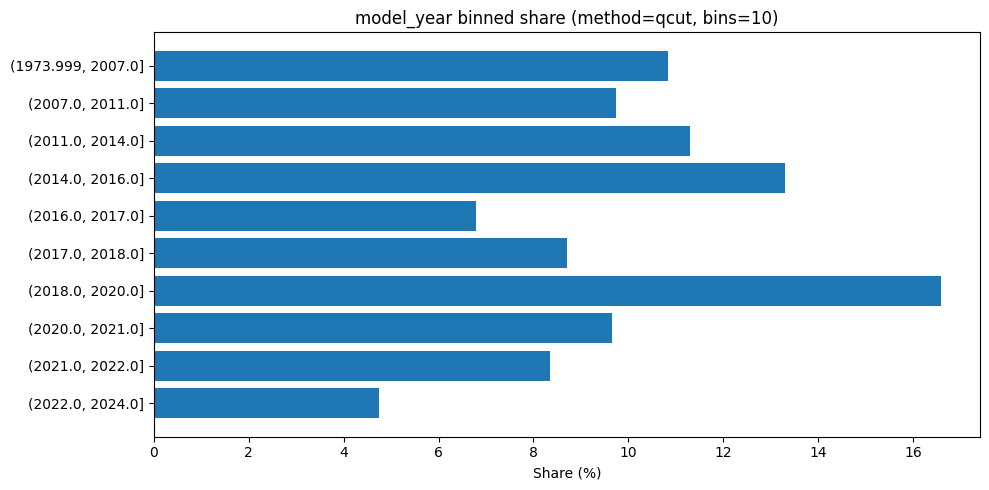


[milage]


,bin,count,percent(%)
milage,,,
"(99.999, 9000.0]","(99.999, 9000.0]",19087,10.12
"(9000.0, 18428.0]","(9000.0, 18428.0]",18646,9.89
"(18428.0, 29000.0]","(18428.0, 29000.0]",18890,10.02
"(29000.0, 45000.0]","(29000.0, 45000.0]",19157,10.16
"(45000.0, 57785.0]","(45000.0, 57785.0]",18502,9.81
"(57785.0, 70579.0]","(57785.0, 70579.0]",18925,10.04
"(70579.0, 87066.0]","(70579.0, 87066.0]",18816,9.98
"(87066.0, 106500.0]","(87066.0, 106500.0]",18835,9.99
"(106500.0, 136731.0]","(106500.0, 136731.0]",18862,10.00


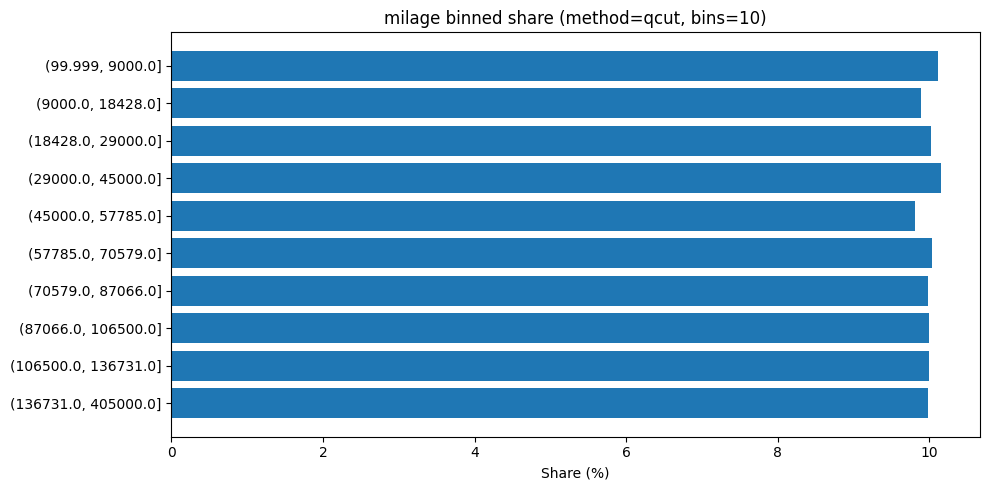

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TARGET = "price"

# =========================
# 수치형 컬럼 정의 (id 제외 추천)
# =========================
NUM_COLS = ["model_year", "milage"]  # 필요하면 추가

# =========================
# 수치형 -> 구간(bin) 생성 함수
# - qcut: 분위수 기준 (각 bin에 비슷한 개수)
# - cut : 값 구간 기준 (균등 간격)
# =========================
def numeric_bin_percent_distribution(df, col, bins=10, method="qcut"):
    s = df[col]

    if method == "qcut":
        binned = pd.qcut(s, q=bins, duplicates="drop")
    else:
        binned = pd.cut(s, bins=bins)

    vc = binned.value_counts(dropna=False).sort_index()
    table = pd.DataFrame({
        "bin": vc.index.astype(str),
        "count": vc.values,
        "percent(%)": (vc / vc.sum() * 100).round(2)
    })
    return table

def plot_numeric_bin_percent(df, col, bins=10, method="qcut"):
    table = numeric_bin_percent_distribution(df, col, bins=bins, method=method)

    plt.figure(figsize=(10, 5))
    plt.barh(table["bin"][::-1], table["percent(%)"][::-1])
    plt.xlabel("Share (%)")
    plt.title(f"{col} binned share (method={method}, bins={bins})")
    plt.tight_layout()
    plt.show()

# 실행 예시
for col in NUM_COLS:
    print(f"\n[{col}]")
    display(numeric_bin_percent_distribution(train, col, bins=10, method="qcut"))
    plot_numeric_bin_percent(train, col, bins=10, method="qcut")


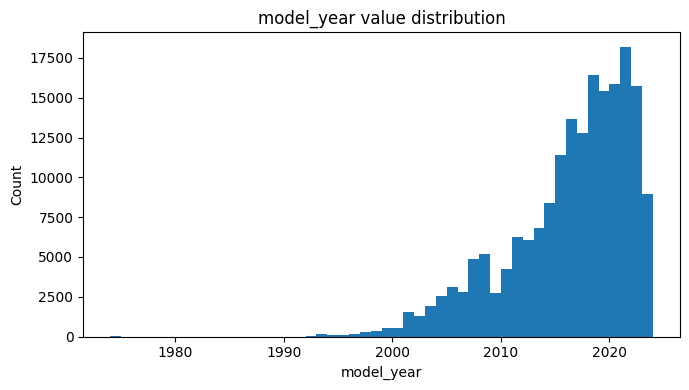

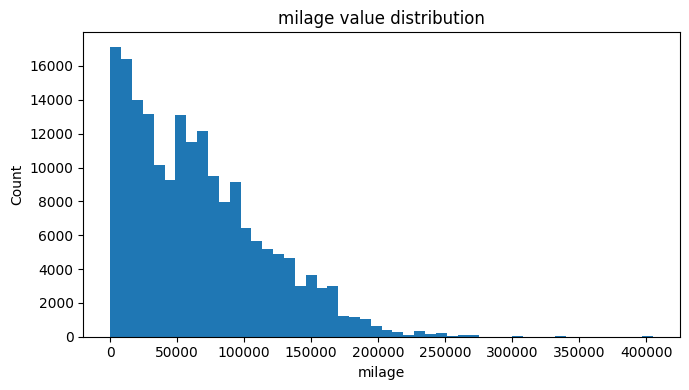

In [34]:
def plot_numeric_distribution(df, col):
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"{col} value distribution")
    plt.tight_layout()
    plt.show()

plot_numeric_distribution(train, "model_year")
plot_numeric_distribution(train, "milage")


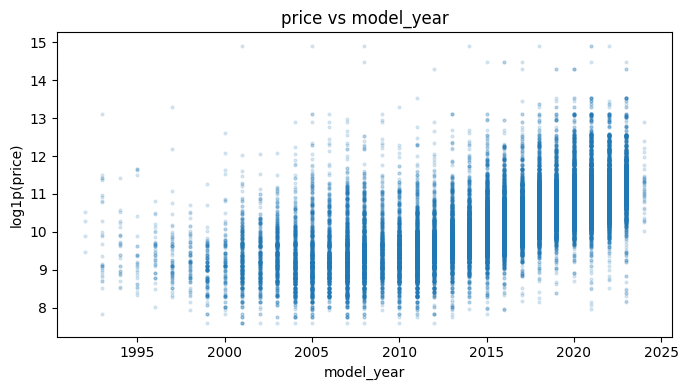

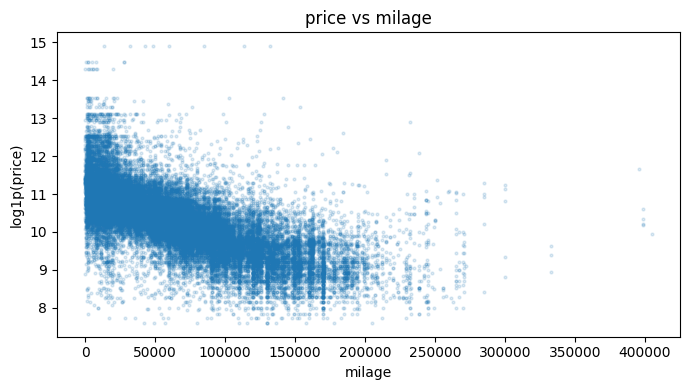

In [35]:
sample = train.sample(40000, random_state=42)

def plot_numeric_vs_price(df, col):
    plt.figure(figsize=(7,4))
    plt.scatter(df[col], np.log1p(df["price"]), s=4, alpha=0.15)
    plt.xlabel(col)
    plt.ylabel("log1p(price)")
    plt.title(f"price vs {col}")
    plt.tight_layout()
    plt.show()

plot_numeric_vs_price(sample, "model_year")
plot_numeric_vs_price(sample, "milage")


C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\3564377159.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = d.groupby("bin")["price"].median()


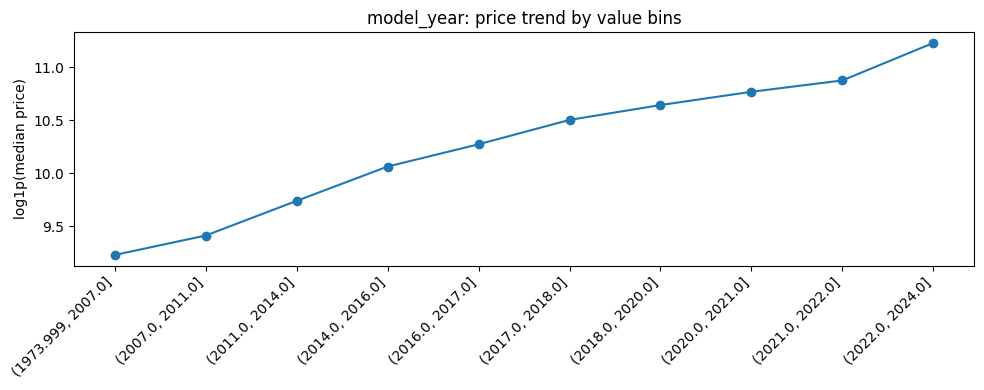

C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\3564377159.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = d.groupby("bin")["price"].median()


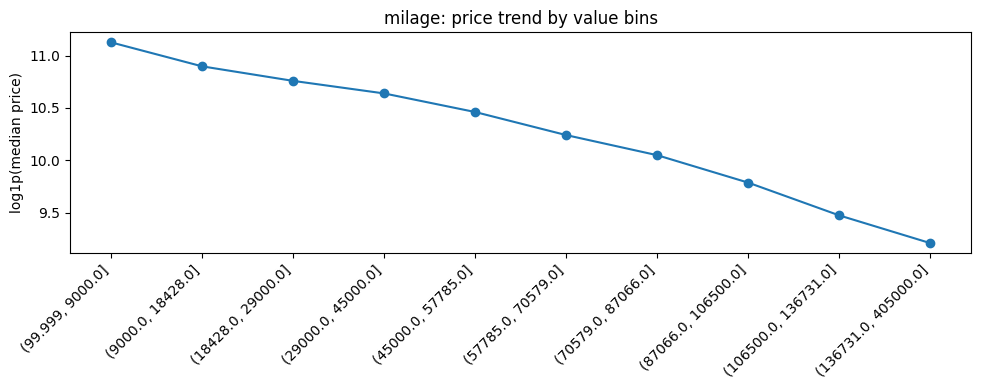

In [36]:
def plot_price_trend_by_bins(df, col, bins=10):
    d = df[[col, "price"]].dropna().copy()
    d["bin"] = pd.qcut(d[col], q=bins, duplicates="drop")

    g = d.groupby("bin")["price"].median()

    plt.figure(figsize=(10,4))
    plt.plot(range(len(g)), np.log1p(g.values), marker="o")
    plt.xticks(range(len(g)), [str(b) for b in g.index], rotation=45, ha="right")
    plt.ylabel("log1p(median price)")
    plt.title(f"{col}: price trend by value bins")
    plt.tight_layout()
    plt.show()

plot_price_trend_by_bins(train, "model_year")
plot_price_trend_by_bins(train, "milage")


### 데이터 시각화(범주형)

In [37]:
import pandas as pd

# =========================
# 범주형 컬럼 정의
# =========================
CAT_COLS = [
    "brand",
    "model",
    "fuel_type",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title"
]

TARGET = "price"

# =========================
# 범주형 % 분포 표 함수
# =========================
def categorical_percent_distribution(df, col):
    vc = df[col].value_counts(dropna=False)
    table = pd.DataFrame({
        "category": vc.index.astype(str),
        "count": vc.values,
        "percent(%)": (vc / vc.sum() * 100).round(2)
    })
    return table

# =========================
# 실행
# =========================
print("===== CATEGORICAL FEATURES DISTRIBUTION (%) =====")
for col in CAT_COLS:
    print(f"\n[{col}]")
    display(categorical_percent_distribution(train, col))


===== CATEGORICAL FEATURES DISTRIBUTION (%) =====

[brand]


,category,count,percent(%)
brand,,,
Ford,Ford,23088,12.25
Mercedes-Benz,Mercedes-Benz,19172,10.17
BMW,BMW,17028,9.03
Chevrolet,Chevrolet,16335,8.66
Audi,Audi,10887,5.77
Porsche,Porsche,10612,5.63
Land,Land,9525,5.05
Toyota,Toyota,8850,4.69
Lexus,Lexus,8643,4.58



[model]


,category,count,percent(%)
model,,,
F-150 XLT,F-150 XLT,2945,1.56
M3 Base,M3 Base,2229,1.18
Camaro 2SS,Camaro 2SS,1709,0.91
M4 Base,M4 Base,1622,0.86
Mustang GT Premium,Mustang GT Premium,1526,0.81
...,...,...,...
ForTwo Pure,ForTwo Pure,2,0.00
XLR Base,XLR Base,1,0.00
X5 3.0i,X5 3.0i,1,0.00



[fuel_type]


,category,count,percent(%)
fuel_type,,,
Gasoline,Gasoline,165940,88.02
Hybrid,Hybrid,6832,3.62
E85 Flex Fuel,E85 Flex Fuel,5406,2.87
NaN,nan,5083,2.70
Diesel,Diesel,3955,2.10
–,–,781,0.41
Plug-In Hybrid,Plug-In Hybrid,521,0.28
not supported,not supported,15,0.01



[engine]


,category,count,percent(%)
engine,,,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,1.84
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902,1.54
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841,1.51
2.0L I4 16V GDI DOHC Turbo,2.0L I4 16V GDI DOHC Turbo,2680,1.42
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451,1.30
...,...,...,...
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1,0.00
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas,139.0HP 1.6L 4 Cylinder Engine Plug-In Electri...,1,0.00
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid,151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hy...,1,0.00



[transmission]


,category,count,percent(%)
transmission,,,
A/T,A/T,49904,26.47
8-Speed A/T,8-Speed A/T,20645,10.95
Transmission w/Dual Shift Mode,Transmission w/Dual Shift Mode,19255,10.21
6-Speed A/T,6-Speed A/T,18044,9.57
6-Speed M/T,6-Speed M/T,11998,6.36
7-Speed A/T,7-Speed A/T,11124,5.90
Automatic,Automatic,10691,5.67
8-Speed Automatic,8-Speed Automatic,8431,4.47
10-Speed A/T,10-Speed A/T,8044,4.27



[ext_col]


,category,count,percent(%)
ext_col,,,
Black,Black,48658,25.81
White,White,43815,23.24
Gray,Gray,25293,13.42
Silver,Silver,16995,9.01
Blue,Blue,14555,7.72
...,...,...,...
Granite Crystal Metallic Clearcoat,Granite Crystal Metallic Clearcoat,5,0.00
GT SILVER,GT SILVER,5,0.00
Blue Caelum,Blue Caelum,5,0.00



[int_col]


,category,count,percent(%)
int_col,,,
Black,Black,107674,57.11
Beige,Beige,24495,12.99
Gray,Gray,21204,11.25
Brown,Brown,5810,3.08
Red,Red,5145,2.73
...,...,...,...
Bianco Polar,Bianco Polar,7,0.00
Classic Red,Classic Red,7,0.00
Cobalt Blue,Cobalt Blue,6,0.00



[accident]


,category,count,percent(%)
accident,,,
None reported,None reported,144514,76.65
At least 1 accident or damage reported,At least 1 accident or damage reported,41567,22.05
NaN,nan,2452,1.30



[clean_title]


,category,count,percent(%)
clean_title,,,
Yes,Yes,167114,88.64
NaN,nan,21419,11.36


In [38]:
def categorical_basic_summary(df, col, topk=10):
    summary = {
        "n_unique": df[col].nunique(dropna=False),
        "missing_ratio(%)": df[col].isna().mean() * 100
    }

    top_values = (
        df[col]
        .fillna("MISSING")
        .value_counts()
        .head(topk)
        .to_frame(name="count")
    )

    return pd.DataFrame(summary, index=[col]), top_values

# 실행 예시
for col in CAT_COLS:
    print(f"\n[{col}]")
    summary, top_values = categorical_basic_summary(train, col)
    display(summary)
    display(top_values)



[brand]


,n_unique,missing_ratio(%)
brand,57,0.0


,count
brand,
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850
Lexus,8643



[model]


,n_unique,missing_ratio(%)
model,1897,0.0


,count
model,
F-150 XLT,2945
M3 Base,2229
Camaro 2SS,1709
M4 Base,1622
Mustang GT Premium,1526
F-150 Lariat,1410
E-Class E 350 4MATIC,1357
1500 Laramie,1249
911 Carrera S,1219



[fuel_type]


,n_unique,missing_ratio(%)
fuel_type,8,2.69608


,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
MISSING,5083
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15



[engine]


,n_unique,missing_ratio(%)
engine,1117,0.0


,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841
2.0L I4 16V GDI DOHC Turbo,2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel,2134



[transmission]


,n_unique,missing_ratio(%)
transmission,52,0.0


,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044



[ext_col]


,n_unique,missing_ratio(%)
ext_col,319,0.0


,count
ext_col,
Black,48658
White,43815
Gray,25293
Silver,16995
Blue,14555
Red,9901
Green,2698
Gold,1668
Brown,1162



[int_col]


,n_unique,missing_ratio(%)
int_col,156,0.0


,count
int_col,
Black,107674
Beige,24495
Gray,21204
Brown,5810
Red,5145
White,4743
–,4527
Jet Black,2398
Ebony,1833



[accident]


,n_unique,missing_ratio(%)
accident,3,1.300568


,count
accident,
None reported,144514
At least 1 accident or damage reported,41567
MISSING,2452



[clean_title]


,n_unique,missing_ratio(%)
clean_title,2,11.360876


,count
clean_title,
Yes,167114
MISSING,21419


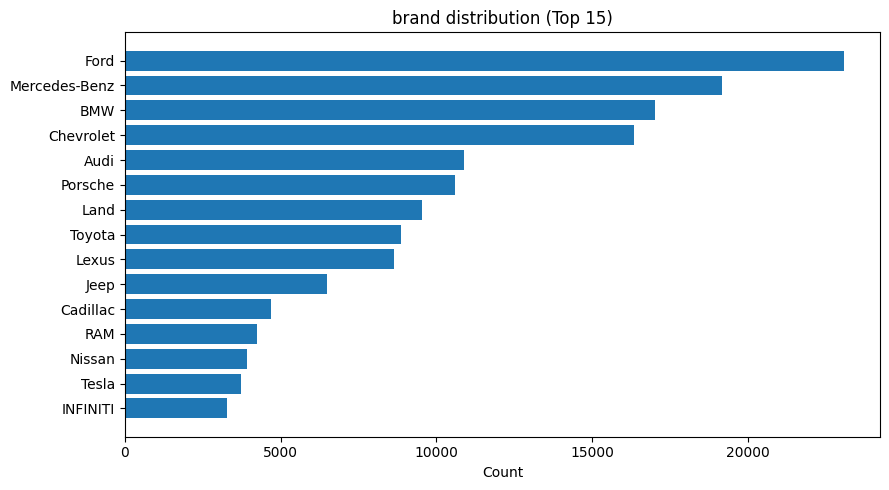

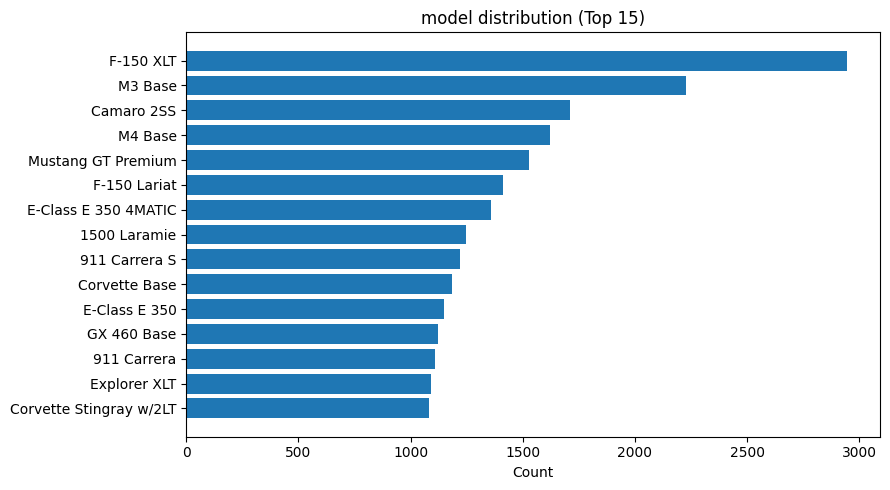

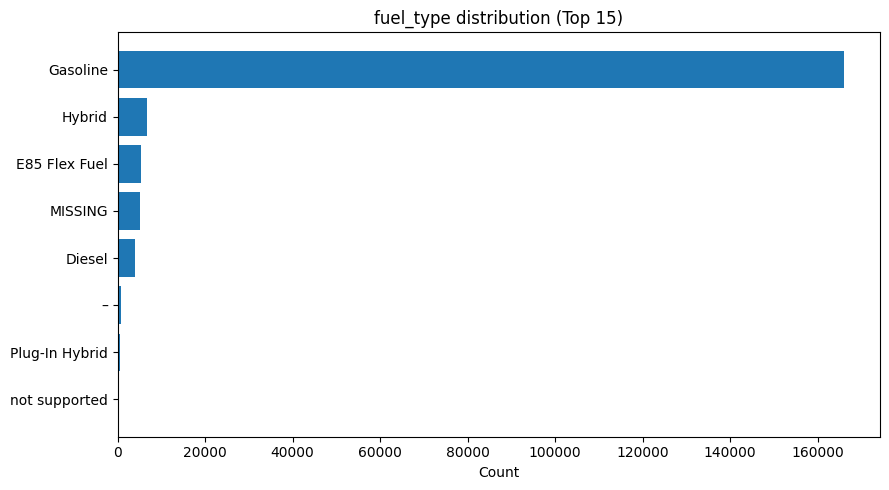

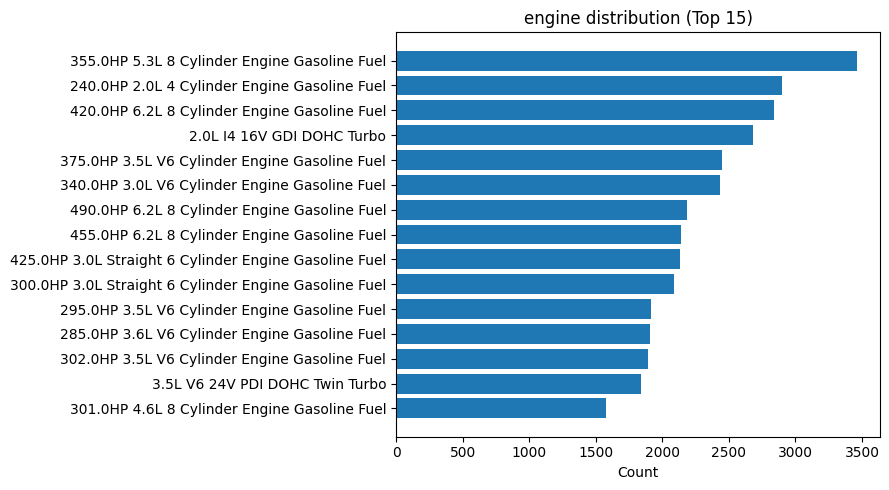

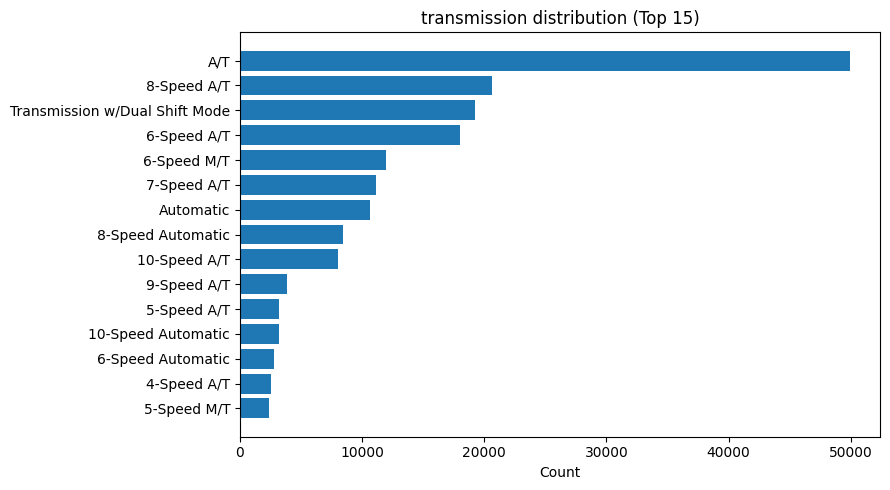

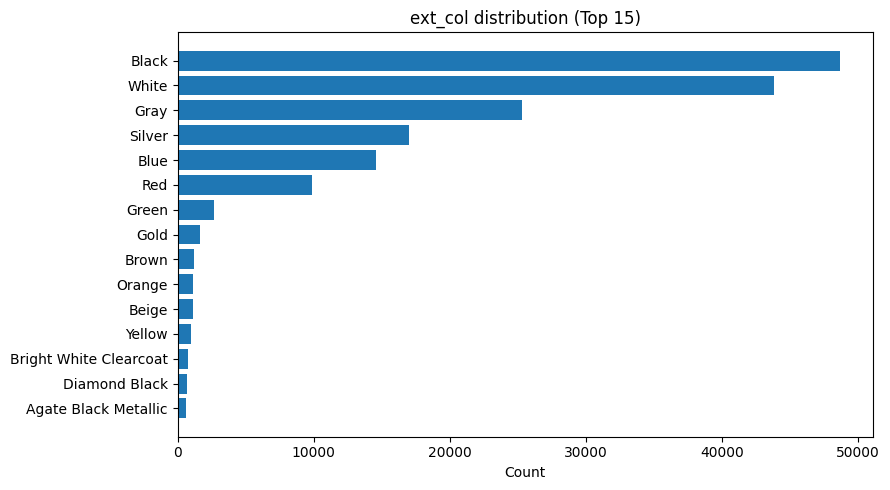

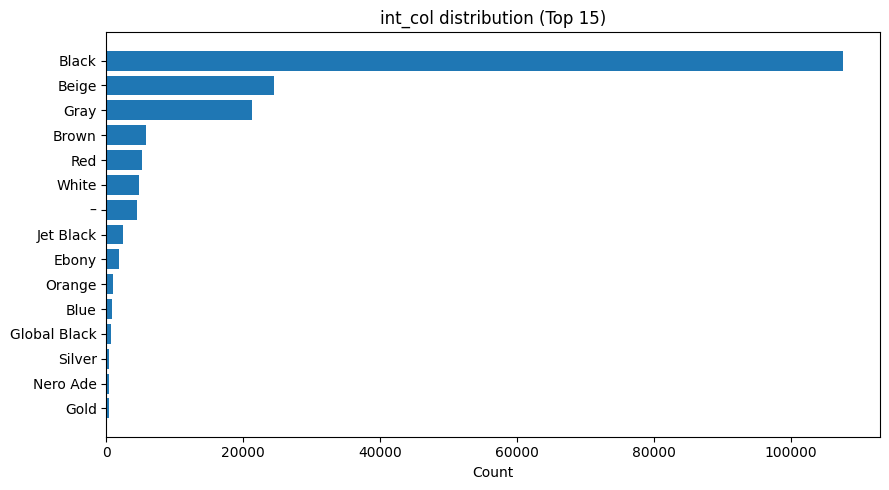

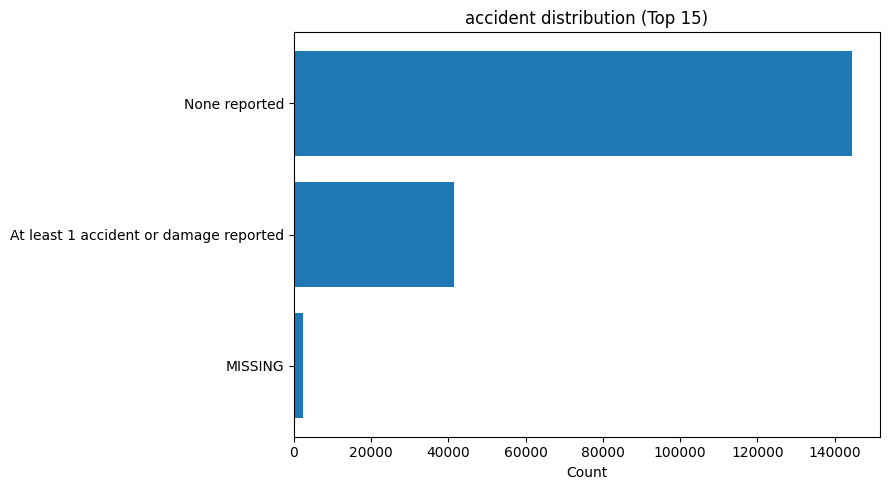

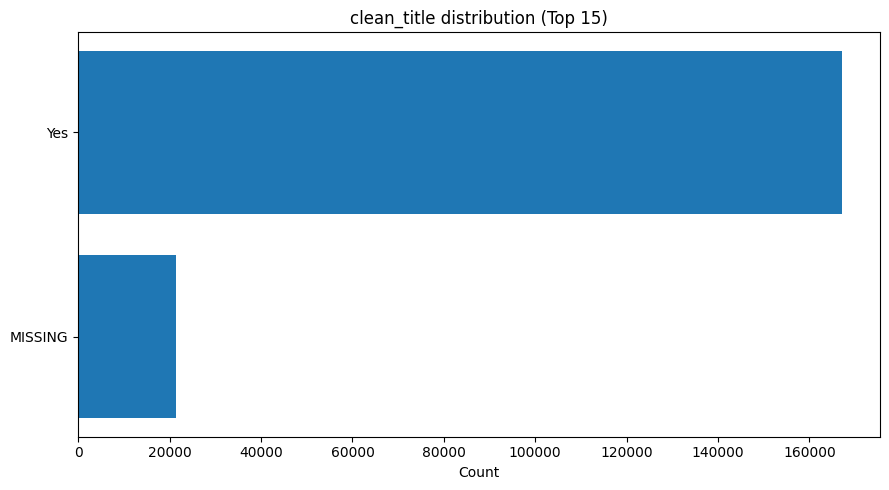

In [39]:
def plot_categorical_distribution(df, col, topk=15):
    vc = df[col].fillna("MISSING").value_counts().head(topk)

    plt.figure(figsize=(9,5))
    plt.barh(vc.index[::-1], vc.values[::-1])
    plt.xlabel("Count")
    plt.title(f"{col} distribution (Top {topk})")
    plt.tight_layout()
    plt.show()

for col in CAT_COLS:
    plot_categorical_distribution(train, col, topk=15)


C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\1972799939.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top, showfliers=False)


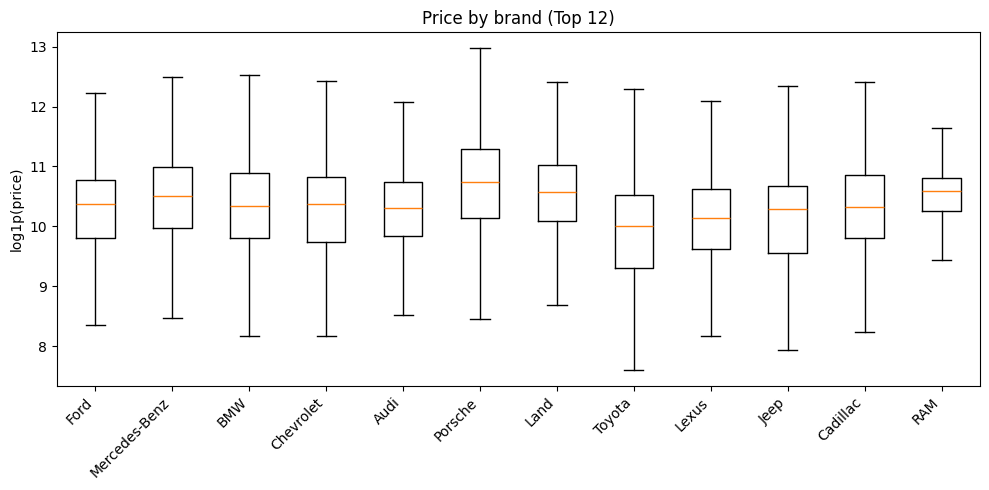

C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\1972799939.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top, showfliers=False)


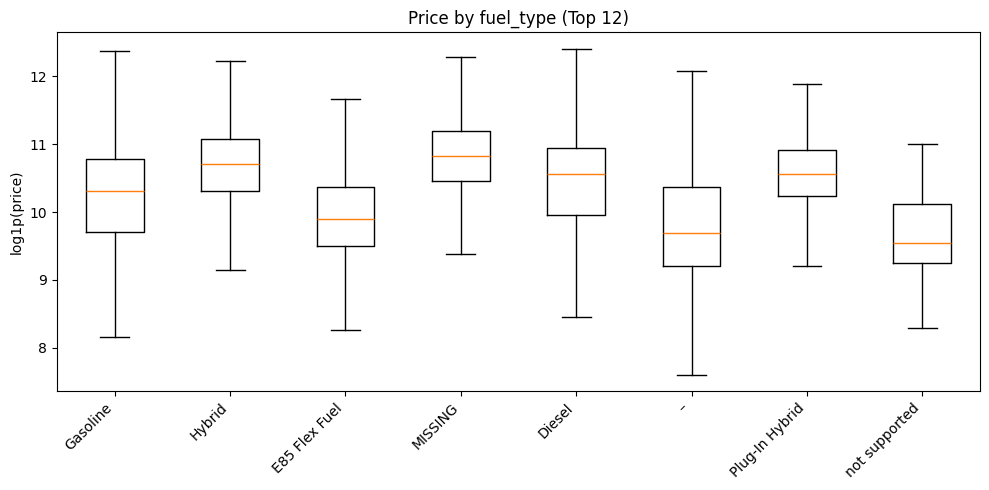

C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\1972799939.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top, showfliers=False)


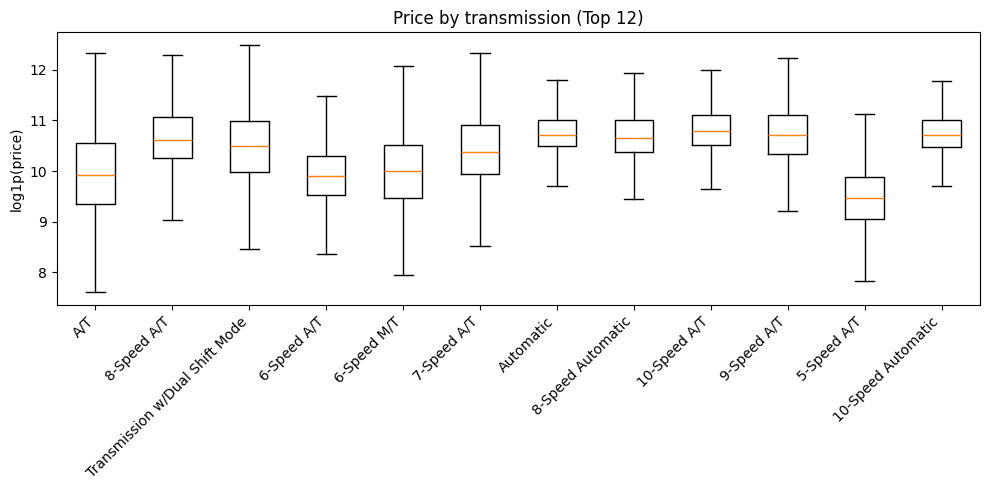

C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\1972799939.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top, showfliers=False)


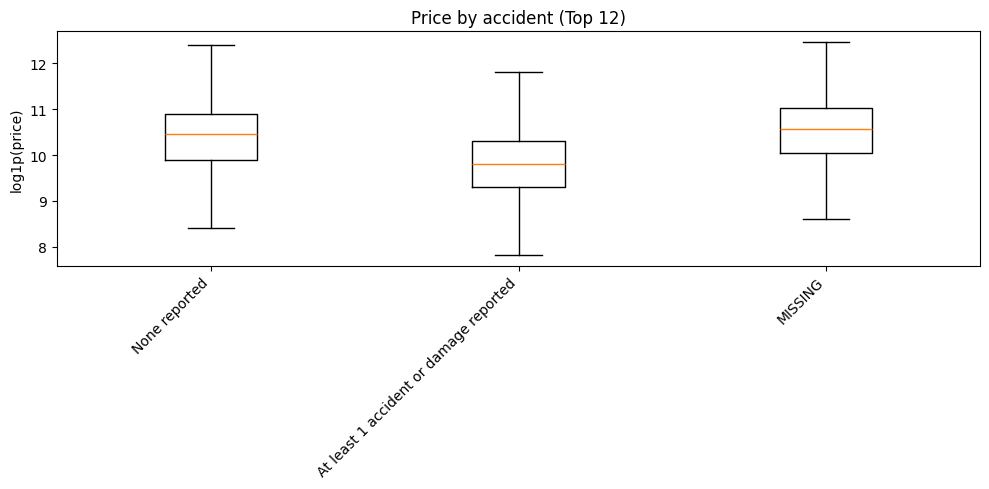

C:\Users\kolan\AppData\Local\Temp\ipykernel_10112\1972799939.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top, showfliers=False)


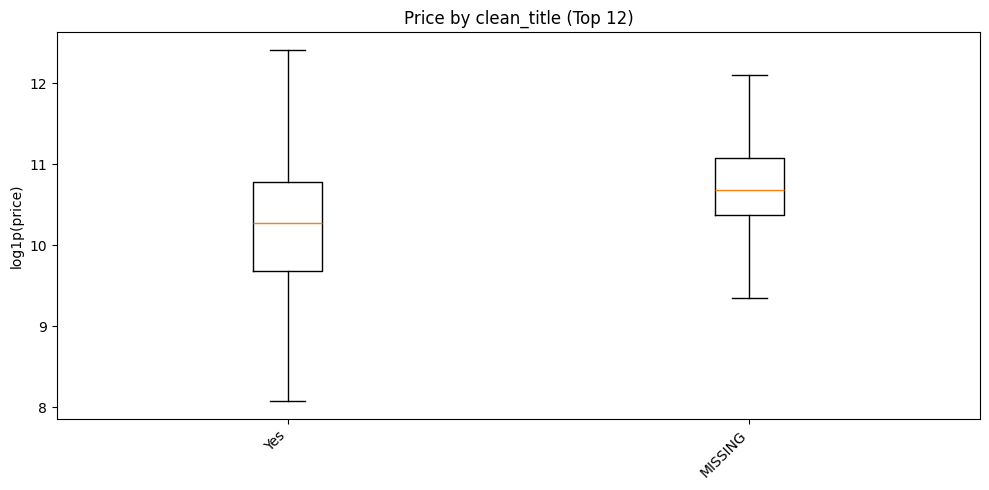

In [40]:
def plot_price_by_category(df, col, topk=12):
    d = df[[col, TARGET]].copy()
    d[col] = d[col].fillna("MISSING")

    top = d[col].value_counts().head(topk).index
    d = d[d[col].isin(top)]

    groups = [np.log1p(d[d[col] == k][TARGET]) for k in top]

    plt.figure(figsize=(10,5))
    plt.boxplot(groups, labels=top, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("log1p(price)")
    plt.title(f"Price by {col} (Top {topk})")
    plt.tight_layout()
    plt.show()

# 핵심 컬럼 위주 실행
KEY_CAT_COLS = ["brand", "fuel_type", "transmission", "accident", "clean_title"]

for col in KEY_CAT_COLS:
    plot_price_by_category(train, col)


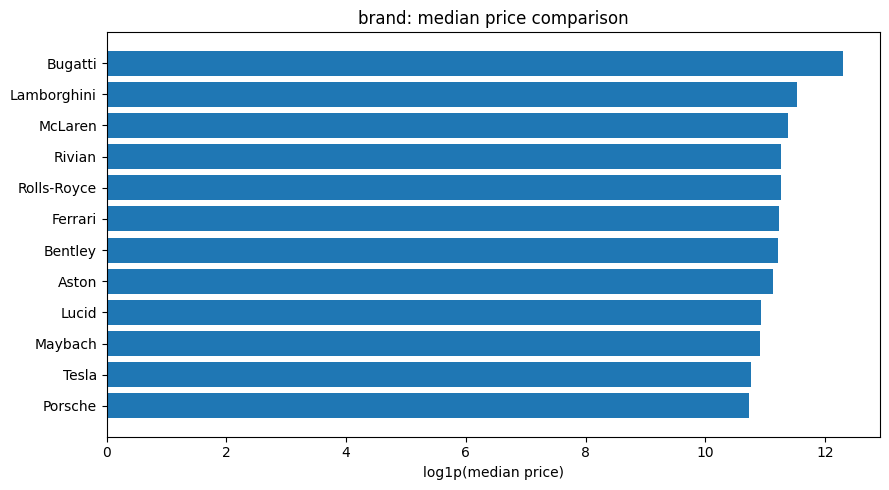

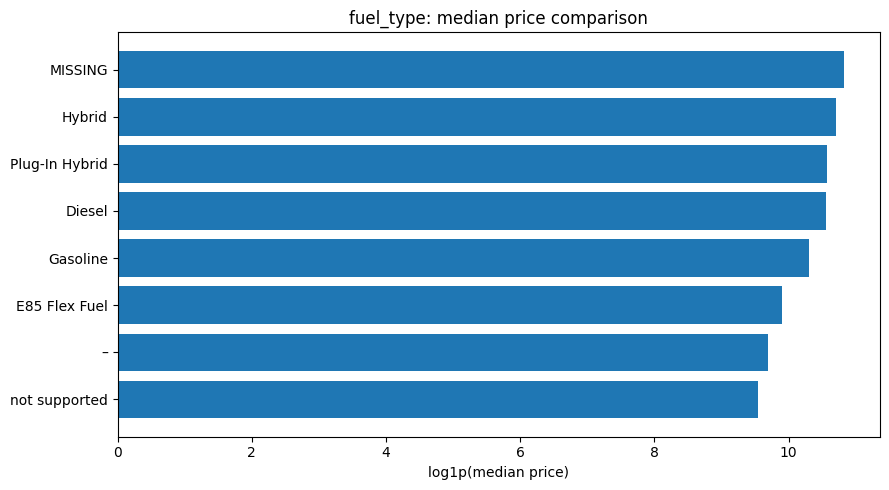

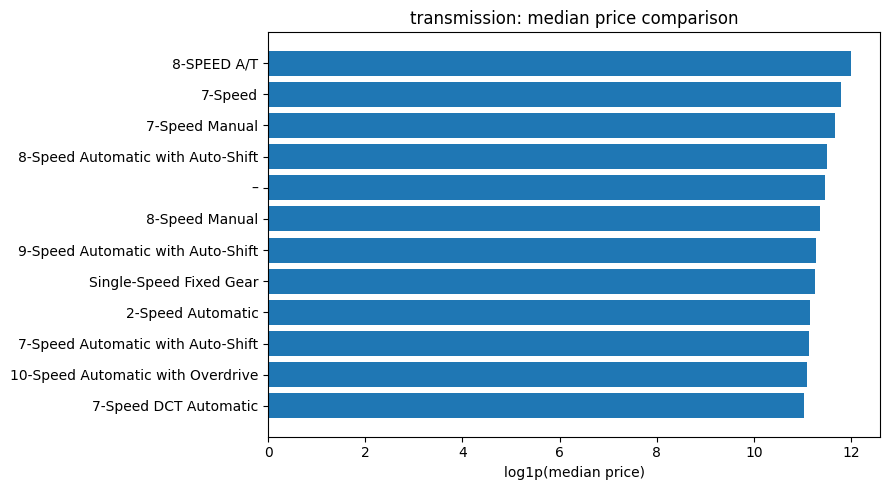

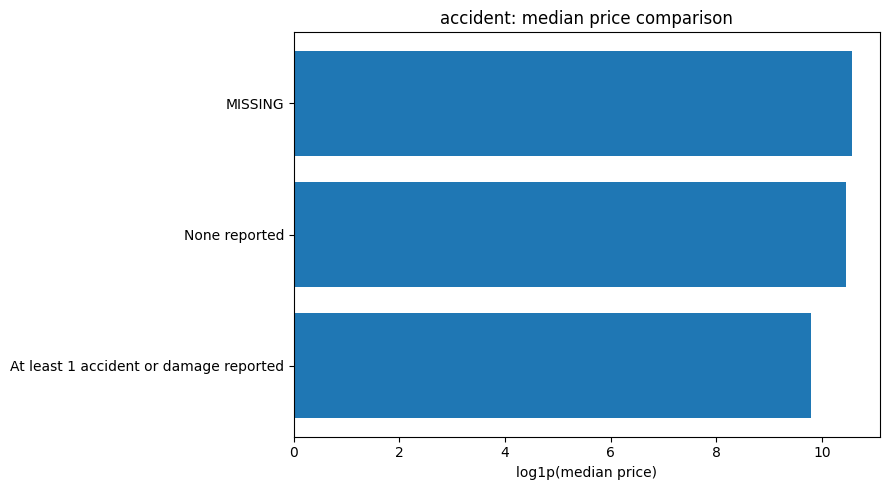

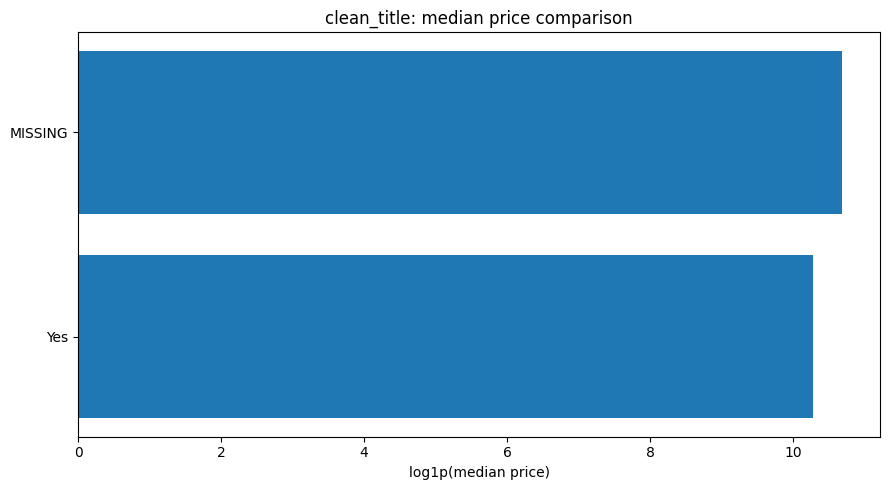

In [41]:
def plot_category_price_median(df, col, topk=12):
    d = df[[col, TARGET]].copy()
    d[col] = d[col].fillna("MISSING")

    g = (
        d.groupby(col)[TARGET]
        .median()
        .sort_values()
        .tail(topk)
    )

    plt.figure(figsize=(9,5))
    plt.barh(g.index, np.log1p(g.values))
    plt.xlabel("log1p(median price)")
    plt.title(f"{col}: median price comparison")
    plt.tight_layout()
    plt.show()

for col in KEY_CAT_COLS:
    plot_category_price_median(train, col)


## 상관계수 분석

,association,type,abs_association
engine,0.712446,categorical_eta_log,0.712446
milage,-0.695371,numeric_pearson_log,0.695371
model,0.671140,categorical_eta_log,0.671140
model_year,0.664250,numeric_pearson_log,0.664250
transmission,0.490737,categorical_eta_log,0.490737
brand,0.358776,categorical_eta_log,0.358776
int_col,0.331081,categorical_eta_log,0.331081
accident,0.296172,categorical_eta_log,0.296172
ext_col,0.286382,categorical_eta_log,0.286382
clean_title,0.200841,categorical_eta_log,0.200841


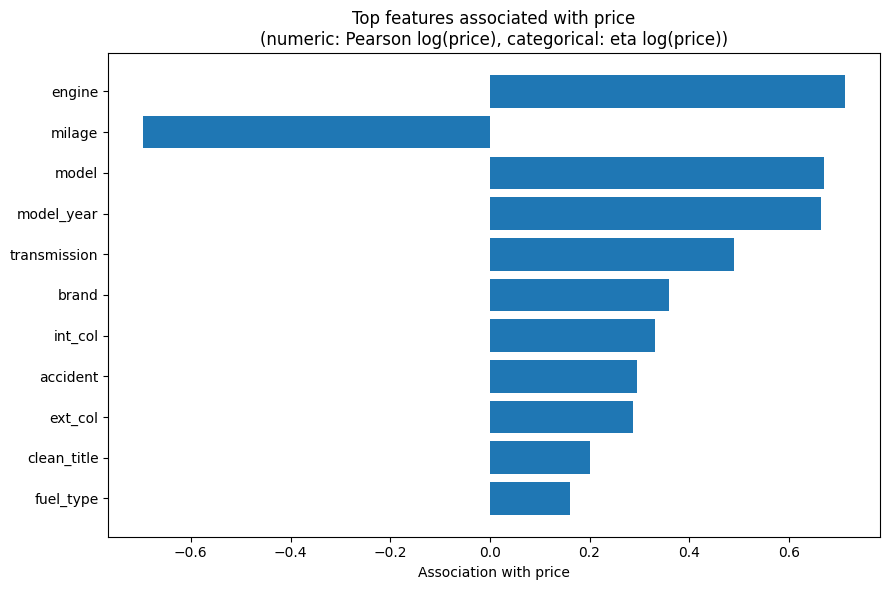

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TARGET = "price"

# ======================================================
# 1. 컬럼 분리
# ======================================================
num_cols = train.select_dtypes(exclude="object").columns.tolist()
num_cols = [c for c in num_cols if c not in ["id", TARGET]]

cat_cols = train.select_dtypes(include="object").columns.tolist()

y_log = np.log1p(train[TARGET])

# ======================================================
# 2. 수치형: Pearson correlation with log(price)
# ======================================================
num_corr = (
    train[num_cols]
    .corrwith(y_log, method="pearson")
    .to_frame(name="association")
)
num_corr["type"] = "numeric_pearson_log"

# ======================================================
# 3. 범주형: Correlation Ratio (η) with log(price)
# ======================================================
def correlation_ratio(categories, values):
    cat = pd.Series(categories).fillna("MISSING").astype(str)
    y = np.asarray(values)

    y_mean = np.mean(y)
    df_tmp = pd.DataFrame({"cat": cat, "y": y})

    grp = df_tmp.groupby("cat")["y"].agg(["mean", "count"])
    ss_between = np.sum(grp["count"] * (grp["mean"] - y_mean) ** 2)
    ss_total = np.sum((y - y_mean) ** 2)

    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0.0


cat_scores = {}
for col in cat_cols:
    cat_scores[col] = correlation_ratio(train[col], y_log)

cat_corr = (
    pd.Series(cat_scores, name="association")
    .to_frame()
)
cat_corr["type"] = "categorical_eta_log"

# ======================================================
# 4. 통합 테이블
# ======================================================
all_assoc = pd.concat([num_corr, cat_corr])
all_assoc["abs_association"] = all_assoc["association"].abs()
all_assoc = all_assoc.sort_values("abs_association", ascending=False)

display(all_assoc)

# ======================================================
# 5. 시각화 (Top 20)
# ======================================================
TOPK = 20
topk_assoc = all_assoc.head(TOPK)

plt.figure(figsize=(9, 6))
plt.barh(
    topk_assoc.index[::-1],
    topk_assoc["association"][::-1]
)
plt.xlabel("Association with price")
plt.title("Top features associated with price\n"
          "(numeric: Pearson log(price), categorical: eta log(price))")
plt.tight_layout()
plt.show()


## Feature Engineering

In [69]:
CURRENT_YEAR = train["model_year"].max()  # 데이터 기준

train["age"] = CURRENT_YEAR - train["model_year"]
train["age"] = train["age"].clip(lower=0)


# 주행거리 로그 변환

In [70]:
train["log_milage"] = np.log1p(train["milage"])


## 연식 대비 주행거리
같은 5만 km라도

1년 탄 차 vs 10년 탄 차 → 의미 완전히 다름

In [71]:
train["milage_per_year"] = train["milage"] / (train["age"] + 1)
train["log_milage_per_year"] = np.log1p(train["milage_per_year"])


### 엔진(engine) 문자열 파싱

추출할 정보

마력(HP)

배기량(L)

실린더 수

In [72]:
import re

def parse_engine(engine_str):
    if pd.isna(engine_str):
        return pd.Series([np.nan, np.nan, np.nan])

    hp = re.search(r"(\d+\.?\d*)HP", engine_str)
    liter = re.search(r"(\d+\.?\d*)L", engine_str)
    cyl = re.search(r"(\d+)\s*Cylinder", engine_str)

    return pd.Series([
        float(hp.group(1)) if hp else np.nan,
        float(liter.group(1)) if liter else np.nan,
        float(cyl.group(1)) if cyl else np.nan
    ])

train[["engine_hp", "engine_liter", "engine_cyl"]] = train["engine"].apply(parse_engine)


In [97]:
import re
import numpy as np
import pandas as pd

def parse_engine_v2(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])

    s = str(s)

    # liter: 2.5L
    m_l = re.search(r"(\d+(\.\d+)?)\s*L", s)
    liter = float(m_l.group(1)) if m_l else np.nan

    # cyl: I4 / V6 / H4 / W12 / ... 우선 숫자만
    m_c = re.search(r"\b([IVHW])\s*([0-9]{1,2})\b", s.upper())
    cyl = float(m_c.group(2)) if m_c else np.nan

    return pd.Series([liter, cyl])

train[["engine_liter", "engine_cyl"]] = train["engine"].apply(parse_engine_v2)

# hp는 데이터에 없을 수도 있으니 (있다면) 기존 파싱 유지/보완
def parse_hp(s):
    if pd.isna(s): 
        return np.nan
    m = re.search(r"(\d+(\.\d+)?)\s*HP", str(s).upper())
    return float(m.group(1)) if m else np.nan

train["engine_hp"] = train["engine"].apply(parse_hp)

# ratio features
train["hp_per_liter"] = train["engine_hp"] / train["engine_liter"]
train["hp_per_cyl"]   = train["engine_hp"] / train["engine_cyl"]

for c in ["hp_per_liter", "hp_per_cyl"]:
    train[c] = train[c].replace([np.inf, -np.inf], np.nan)


In [73]:
train["brand_freq"] = train["brand"].map(train["brand"].value_counts())
train["model_freq"] = train["model"].map(train["model"].value_counts())


### 사고 / 타이틀 이진화

In [74]:
train["has_accident"] = train["accident"].eq(
    "At least 1 accident or damage reported"
).astype(int)

train["is_clean_title"] = train["clean_title"].eq("Yes").astype(int)


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "price"
y_log = np.log1p(train[TARGET])

def correlation_ratio(categories, values):
    cat = pd.Series(categories).fillna("MISSING").astype(str)
    y = np.asarray(values)

    y_mean = np.mean(y)
    df_tmp = pd.DataFrame({"cat": cat, "y": y})
    grp = df_tmp.groupby("cat")["y"].agg(["mean", "count"])

    ss_between = np.sum(grp["count"] * (grp["mean"] - y_mean) ** 2)
    ss_total = np.sum((y - y_mean) ** 2)

    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0.0


In [98]:
def is_black(x):
    if pd.isna(x):
        return 0
    return int("black" in str(x).lower())

train["is_black_ext"] = train["ext_col"].apply(is_black)
train["is_black_int"] = train["int_col"].apply(is_black)


### BEFORE: FE 적용 전 연관도 계산

In [78]:
# ===== BEFORE =====
num_cols_before = ["model_year", "milage"]
cat_cols = train.select_dtypes(include="object").columns.tolist()

# 수치형
num_before = (
    train[num_cols_before]
    .corrwith(y_log, method="pearson")
    .to_frame(name="association")
)
num_before["stage"] = "before"
num_before["type"] = "numeric"

# 범주형
cat_before = {}
for col in cat_cols:
    cat_before[col] = correlation_ratio(train[col], y_log)

cat_before = pd.Series(cat_before, name="association").to_frame()
cat_before["stage"] = "before"
cat_before["type"] = "categorical"

before_assoc = pd.concat([num_before, cat_before])
before_assoc["abs_assoc"] = before_assoc["association"].abs()


### AFTER: FE 적용 후 연관도 계산

In [79]:
# ===== AFTER =====
fe_numeric_cols = [
    "model_year", "milage",
    "age", "log_milage",
    "milage_per_year", "log_milage_per_year",
    "engine_hp", "engine_liter", "engine_cyl",
    "hp_per_liter", "hp_per_cyl",
    "brand_freq", "model_freq",
    "has_accident", "is_clean_title",
    "is_black_ext", "is_black_int"
]

fe_numeric_cols = [c for c in fe_numeric_cols if c in train.columns]

num_after = (
    train[fe_numeric_cols]
    .corrwith(y_log, method="pearson")
    .to_frame(name="association")
)
num_after["stage"] = "after"
num_after["type"] = "numeric"

# 범주형은 동일 기준으로 다시 계산
cat_after = {}
for col in cat_cols:
    cat_after[col] = correlation_ratio(train[col], y_log)

cat_after = pd.Series(cat_after, name="association").to_frame()
cat_after["stage"] = "after"
cat_after["type"] = "categorical"

after_assoc = pd.concat([num_after, cat_after])
after_assoc["abs_assoc"] = after_assoc["association"].abs()


In [80]:
compare = (
    pd.concat([
        before_assoc[before_assoc["type"]=="numeric"][["association"]]
            .rename(columns={"association":"before"}),
        after_assoc[after_assoc["type"]=="numeric"][["association"]]
            .rename(columns={"association":"after"})
    ], axis=1)
)

compare["abs_before"] = compare["before"].abs()
compare["abs_after"] = compare["after"].abs()
compare["delta"] = compare["abs_after"] - compare["abs_before"]

compare = compare.sort_values("abs_after", ascending=False)
display(compare)


,before,after,abs_before,abs_after,delta
milage,-0.695371,-0.695371,0.695371,0.695371,0.0
age,NaN,-0.664250,NaN,0.664250,NaN
model_year,0.664250,0.664250,0.664250,0.664250,0.0
log_milage,NaN,-0.635457,NaN,0.635457,NaN
engine_hp,NaN,0.543625,NaN,0.543625,NaN
log_milage_per_year,NaN,-0.348943,NaN,0.348943,NaN
has_accident,NaN,-0.295789,NaN,0.295789,NaN
milage_per_year,NaN,-0.250922,NaN,0.250922,NaN
engine_cyl,NaN,0.218311,NaN,0.218311,NaN
is_clean_title,NaN,-0.200841,NaN,0.200841,NaN


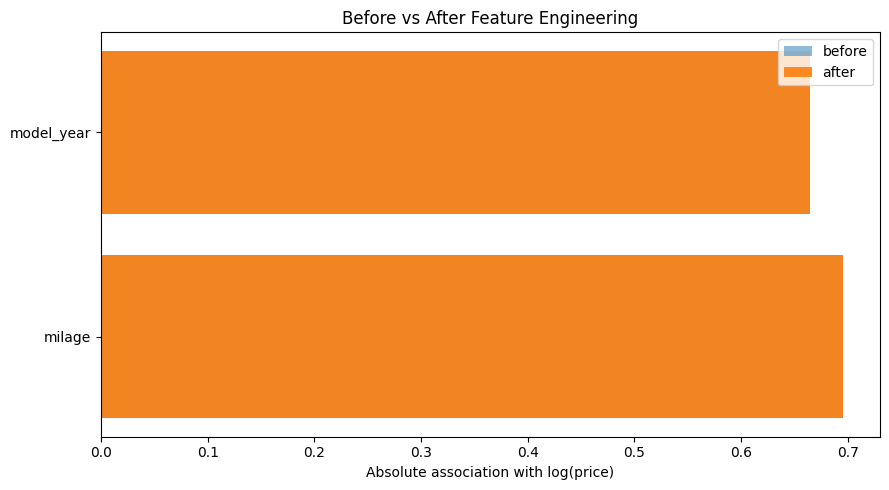

In [81]:
top = compare.dropna().head(10)

plt.figure(figsize=(9,5))
plt.barh(top.index, top["abs_before"], alpha=0.5, label="before")
plt.barh(top.index, top["abs_after"], alpha=0.9, label="after")
plt.xlabel("Absolute association with log(price)")
plt.title("Before vs After Feature Engineering")
plt.legend()
plt.tight_layout()
plt.show()


### 결측치 처리

In [82]:
cat_missing_cols = [
    "fuel_type", "accident", "clean_title",
    "brand", "model", "engine", "transmission",
    "ext_col", "int_col"
]

for col in cat_missing_cols:
    if col in train.columns:
        train[col] = train[col].fillna("MISSING")


In [84]:
engine_num_cols = [
    "engine_hp", "engine_liter", "engine_cyl",
    "hp_per_liter", "hp_per_cyl"
]

for col in engine_num_cols:
    if col in train.columns:
        train[f"{col}_missing"] = train[col].isna().astype(int)
        train[col] = train[col].fillna(train[col].median())


In [85]:
train.isnull().sum()

id                      0
brand                   0
model                   0
model_year              0
milage                  0
fuel_type               0
engine                  0
transmission            0
ext_col                 0
int_col                 0
accident                0
clean_title             0
price                   0
age                     0
log_milage              0
milage_per_year         0
log_milage_per_year     0
engine_hp               0
engine_liter            0
engine_cyl              0
brand_freq              0
model_freq              0
has_accident            0
is_clean_title          0
engine_hp_missing       0
engine_liter_missing    0
engine_cyl_missing      0
dtype: int64

### 최종 전처리

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

TARGET = "price"

NUM_COLS = [
    # 원본
    "model_year", "milage",

    # FE
    "age",
    "log_milage",
    "milage_per_year",
    "log_milage_per_year",

    # engine FE
    "engine_hp", "engine_liter", "engine_cyl",
    "hp_per_liter", "hp_per_cyl",

    # frequency
    "brand_freq", "model_freq",

    # binary FE
    "has_accident", "is_clean_title",
    "is_black_ext", "is_black_int",

    # missing flags
    "engine_hp_missing",
    "engine_liter_missing",
    "engine_cyl_missing",
    "hp_per_liter_missing",
    "hp_per_cyl_missing"
]

NUM_COLS = [c for c in NUM_COLS if c in train.columns]

CAT_COLS = [
    "brand", "model", "fuel_type", "engine",
    "transmission", "ext_col", "int_col",
    "accident", "clean_title"
]

CAT_COLS = [c for c in CAT_COLS if c in train.columns]

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# ✅ sklearn 버전 호환: sparse_output(신버전) / sparse(구버전)
try:
    ohe = OneHotEncoder(
        handle_unknown="ignore",
        min_frequency=20,
        sparse_output=False
    )
except TypeError:
    ohe = OneHotEncoder(
        handle_unknown="ignore",
        min_frequency=20,
        sparse=False
    )

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
    ("onehot", ohe)
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, NUM_COLS),
        ("cat", categorical_pipeline, CAT_COLS)
    ],
    remainder="drop"
)

X = train.drop(columns=[TARGET, "id"])
y = np.log1p(train[TARGET])

X_transformed = preprocessor.fit_transform(X)

print("변환 후 shape:", X_transformed.shape)


변환 후 shape: (188533, 2851)


## 모델 생성(LightGBM)

In [99]:
# =========================
# FINAL CV CELL (Leak-free)
# =========================
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

SEED = 42
N_SPLITS = 5
TARGET = "price"

# ---- 1) Feature engineering (safe, fast) ----
def add_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # black flags
    if "ext_col" in df.columns:
        df["is_black_ext"] = df["ext_col"].astype(str).str.lower().str.contains("black", na=False).astype(int)
    else:
        df["is_black_ext"] = 0

    if "int_col" in df.columns:
        df["is_black_int"] = df["int_col"].astype(str).str.lower().str.contains("black", na=False).astype(int)
    else:
        df["is_black_int"] = 0

    # engine parsing: liter + cylinders (robust-ish)
    def _parse_engine(s):
        if pd.isna(s):
            return np.nan, np.nan
        s = str(s)

        m_l = re.search(r"(\d+(\.\d+)?)\s*L", s)
        liter = float(m_l.group(1)) if m_l else np.nan

        m_c = re.search(r"\b([IVHW])\s*([0-9]{1,2})\b", s.upper())
        cyl = float(m_c.group(2)) if m_c else np.nan

        return liter, cyl

    if "engine" in df.columns:
        tmp = df["engine"].apply(_parse_engine)
        df["engine_liter"] = tmp.apply(lambda x: x[0])
        df["engine_cyl"]   = tmp.apply(lambda x: x[1])
    else:
        df["engine_liter"] = np.nan
        df["engine_cyl"]   = np.nan

    # age / usage intensity
    if "model_year" in df.columns:
        # 데이터 최신 연도 기준으로 age 계산 (누수 없음)
        max_year = pd.to_numeric(df["model_year"], errors="coerce").max()
        df["vehicle_age"] = (max_year - pd.to_numeric(df["model_year"], errors="coerce")).clip(lower=0)
    else:
        df["vehicle_age"] = np.nan

    if "milage" in df.columns:
        mil = pd.to_numeric(df["milage"], errors="coerce")
        df["milage_per_year"] = mil / (df["vehicle_age"].fillna(0) + 1)
    else:
        df["milage_per_year"] = np.nan

    return df


# ---- 2) Prepare data ----
assert TARGET in train.columns, f"train에 '{TARGET}' 컬럼이 필요해."
X_full = train.drop(columns=[c for c in [TARGET, "id"] if c in train.columns])
y_full = np.log1p(train[TARGET].values)

X_full = add_features(X_full)

# auto-detect column types
cat_cols = [c for c in X_full.columns if X_full[c].dtype == "object"]
num_cols = [c for c in X_full.columns if c not in cat_cols]

# preprocessing (fold별로 fit될 것)
preprocessor_template = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", min_frequency=10, sparse_output=True))
        ]), cat_cols),
    ],
    remainder="drop"
)

# ---- 3) CV (Leak-free) ----
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

lgb_params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "num_leaves": 256,
    "min_data_in_leaf": 50,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "lambda_l2": 1.0,
    "verbosity": -1,
    "seed": SEED,
}

oof = np.zeros(len(X_full), dtype=float)
rmse_scores = []
models = []

for fold, (tr_idx, val_idx) in enumerate(kf.split(X_full), 1):
    X_tr_raw, X_val_raw = X_full.iloc[tr_idx], X_full.iloc[val_idx]
    y_tr, y_val = y_full[tr_idx], y_full[val_idx]

    # ✅ fold 안에서 fit/transform (누수 방지)
    preprocessor = preprocessor_template
    X_tr = preprocessor.fit_transform(X_tr_raw)
    X_val = preprocessor.transform(X_val_raw)

    dtrain = lgb.Dataset(X_tr, label=y_tr)
    dvalid = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        lgb_params,
        dtrain,
        num_boost_round=20000,
        valid_sets=[dvalid],
        callbacks=[
            lgb.early_stopping(stopping_rounds=300),
            lgb.log_evaluation(200),
        ],
    )

    pred_val = model.predict(X_val, num_iteration=model.best_iteration)
    oof[val_idx] = pred_val

    rmse = np.sqrt(mean_squared_error(y_val, pred_val))
    rmse_scores.append(rmse)
    models.append((model, preprocessor))

    print(f"[Fold {fold}] RMSE(log1p)={rmse:.5f} | best_iter={model.best_iteration}")

print("\nCV RMSE(log1p):", float(np.mean(rmse_scores)), "±", float(np.std(rmse_scores)))
print("OOF RMSE(log1p):", float(np.sqrt(mean_squared_error(y_full, oof))))

# (원하면) 원 스케일 RMSE도 대략 확인 가능 (비선형이라 참고용)
oof_price = np.expm1(oof)
true_price = train[TARGET].values
rmse_price = np.sqrt(mean_squared_error(true_price, oof_price))
print("OOF RMSE(price scale, ref):", float(rmse_price))


Training until validation scores don't improve for 300 rounds
[200]	valid_0's rmse: 0.490237
[400]	valid_0's rmse: 0.490359
Early stopping, best iteration is:
[288]	valid_0's rmse: 0.489946
[Fold 1] RMSE(log1p)=0.48995 | best_iter=288
Training until validation scores don't improve for 300 rounds
[200]	valid_0's rmse: 0.48666
[400]	valid_0's rmse: 0.486989
Early stopping, best iteration is:
[250]	valid_0's rmse: 0.486524
[Fold 2] RMSE(log1p)=0.48652 | best_iter=250
Training until validation scores don't improve for 300 rounds
[200]	valid_0's rmse: 0.489102
[400]	valid_0's rmse: 0.489081
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.488729
[Fold 3] RMSE(log1p)=0.48873 | best_iter=299
Training until validation scores don't improve for 300 rounds
[200]	valid_0's rmse: 0.486561
[400]	valid_0's rmse: 0.486965
Early stopping, best iteration is:
[265]	valid_0's rmse: 0.486436
[Fold 4] RMSE(log1p)=0.48644 | best_iter=265
Training until validation scores don't improve for 300 rounds

### 모델 생성(CatBoost)

In [100]:
# =========================
# FINAL CV CELL (CatBoost)
# =========================
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool

SEED = 42
N_SPLITS = 5
TARGET = "price"

# ---- 1) Feature engineering ----
def add_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # black flags
    if "ext_col" in df.columns:
        df["is_black_ext"] = df["ext_col"].astype(str).str.lower().str.contains("black", na=False).astype(int)
    else:
        df["is_black_ext"] = 0

    if "int_col" in df.columns:
        df["is_black_int"] = df["int_col"].astype(str).str.lower().str.contains("black", na=False).astype(int)
    else:
        df["is_black_int"] = 0

    # engine parsing: liter + cylinders (robust-ish)
    def _parse_engine(s):
        if pd.isna(s):
            return np.nan, np.nan
        s = str(s)

        m_l = re.search(r"(\d+(\.\d+)?)\s*L", s)
        liter = float(m_l.group(1)) if m_l else np.nan

        m_c = re.search(r"\b([IVHW])\s*([0-9]{1,2})\b", s.upper())
        cyl = float(m_c.group(2)) if m_c else np.nan

        return liter, cyl

    if "engine" in df.columns:
        tmp = df["engine"].apply(_parse_engine)
        df["engine_liter"] = tmp.apply(lambda x: x[0])
        df["engine_cyl"]   = tmp.apply(lambda x: x[1])
    else:
        df["engine_liter"] = np.nan
        df["engine_cyl"]   = np.nan

    # age / usage intensity
    if "model_year" in df.columns:
        max_year = pd.to_numeric(df["model_year"], errors="coerce").max()
        df["vehicle_age"] = (max_year - pd.to_numeric(df["model_year"], errors="coerce")).clip(lower=0)
    else:
        df["vehicle_age"] = np.nan

    if "milage" in df.columns:
        mil = pd.to_numeric(df["milage"], errors="coerce")
        df["milage_per_year"] = mil / (df["vehicle_age"].fillna(0) + 1)
    else:
        df["milage_per_year"] = np.nan

    return df

# ---- 2) Prepare data ----
assert TARGET in train.columns, f"train에 '{TARGET}' 컬럼이 필요해."

X_full = train.drop(columns=[c for c in [TARGET, "id"] if c in train.columns]).copy()
y_full = np.log1p(train[TARGET].values)

X_full = add_features(X_full)

# CatBoost는 object/str을 cat으로 잘 처리하지만, 결측은 문자열로 통일해주면 안정적
for c in X_full.columns:
    if X_full[c].dtype == "object":
        X_full[c] = X_full[c].fillna("NA").astype(str)

# ---- 3) Cat / Text feature 지정 ----
cat_cols = [c for c in X_full.columns if X_full[c].dtype == "object"]
cat_features = [X_full.columns.get_loc(c) for c in cat_cols]

# text_features: engine 같은 "설명 문자열"이 있으면 넣어보는 게 보통 이득
text_features = []
if "engine" in X_full.columns and X_full["engine"].dtype == "object":
    text_features = [X_full.columns.get_loc("engine")]  # engine을 텍스트로 사용

# ---- 4) CV ----
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

params = {
    "loss_function": "RMSE",
    "iterations": 20000,
    "learning_rate": 0.03,
    "depth": 8,
    "l2_leaf_reg": 5,
    "random_strength": 1.0,
    "bootstrap_type": "Bayesian",
    "bagging_temperature": 1.0,
    "random_seed": SEED,
    "eval_metric": "RMSE",
    "early_stopping_rounds": 300,
    "verbose": 200,
    "allow_writing_files": False,
}

oof = np.zeros(len(X_full), dtype=float)
rmse_scores = []
models = []

for fold, (tr_idx, val_idx) in enumerate(kf.split(X_full), 1):
    X_tr, X_val = X_full.iloc[tr_idx], X_full.iloc[val_idx]
    y_tr, y_val = y_full[tr_idx], y_full[val_idx]

    train_pool = Pool(
        X_tr, y_tr,
        cat_features=cat_features,
        text_features=text_features if len(text_features) > 0 else None
    )
    val_pool = Pool(
        X_val, y_val,
        cat_features=cat_features,
        text_features=text_features if len(text_features) > 0 else None
    )

    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)

    pred_val = model.predict(val_pool)
    oof[val_idx] = pred_val

    rmse = np.sqrt(mean_squared_error(y_val, pred_val))
    rmse_scores.append(rmse)
    models.append(model)

    print(f"[Fold {fold}] RMSE(log1p)={rmse:.5f} | best_iter={model.get_best_iteration()}")

print("\nCV RMSE(log1p):", float(np.mean(rmse_scores)), "±", float(np.std(rmse_scores)))
print("OOF RMSE(log1p):", float(np.sqrt(mean_squared_error(y_full, oof))))

# 참고용: 원 스케일 RMSE (비선형이라 참고)
oof_price = np.expm1(oof)
true_price = train[TARGET].values
rmse_price = np.sqrt(mean_squared_error(true_price, oof_price))
print("OOF RMSE(price scale, ref):", float(rmse_price))


0:	learn: 0.8286942	test: 0.8311870	best: 0.8311870 (0)	total: 184ms	remaining: 1h 1m 15s
200:	learn: 0.4937551	test: 0.4990062	best: 0.4990062 (200)	total: 37.1s	remaining: 1h 53s
400:	learn: 0.4898365	test: 0.4965242	best: 0.4965242 (400)	total: 1m 10s	remaining: 57m 25s
600:	learn: 0.4869595	test: 0.4953445	best: 0.4953445 (600)	total: 1m 44s	remaining: 56m 2s
800:	learn: 0.4847848	test: 0.4945489	best: 0.4945489 (800)	total: 2m 17s	remaining: 54m 52s
1000:	learn: 0.4829512	test: 0.4940696	best: 0.4940696 (1000)	total: 2m 51s	remaining: 54m 9s
1200:	learn: 0.4812332	test: 0.4935458	best: 0.4935458 (1200)	total: 3m 25s	remaining: 53m 34s
1400:	learn: 0.4796762	test: 0.4932049	best: 0.4932049 (1400)	total: 4m	remaining: 53m 18s
1600:	learn: 0.4783730	test: 0.4929480	best: 0.4929480 (1600)	total: 4m 39s	remaining: 53m 35s
1800:	learn: 0.4769864	test: 0.4926650	best: 0.4926642 (1798)	total: 5m 22s	remaining: 54m 23s
2000:	learn: 0.4757426	test: 0.4924585	best: 0.4924585 (2000)	total: 6m

KeyboardInterrupt: 

In [95]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

y = np.log1p(train["price"])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
base_scores = []

for tr_idx, val_idx in kf.split(y):
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    pred = np.full(len(y_val), y_tr.mean())  # train mean으로 예측
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    base_scores.append(rmse)

print("Baseline RMSE (predict mean of log-price):", np.mean(base_scores), "+/-", np.std(base_scores))


Baseline RMSE (predict mean of log-price): 0.8441713806436197 +/- 0.0014436034965764253


In [96]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

y = np.log1p(train["price"])

# (너가 쓰던 NUM_COLS, CAT_COLS 그대로 사용)
X = train[NUM_COLS + CAT_COLS].copy()

for col in CAT_COLS:
    X[col] = X[col].fillna("MISSING").astype(str)

X[NUM_COLS] = X[NUM_COLS].replace([np.inf, -np.inf], np.nan)
X[NUM_COLS] = X[NUM_COLS].fillna(X[NUM_COLS].median())

cat_feature_idx = [X.columns.get_loc(c) for c in CAT_COLS]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cat_params = {
    "loss_function": "RMSE",
    "iterations": 5000,
    "learning_rate": 0.05,
    "depth": 8,
    "l2_leaf_reg": 3,
    "random_seed": 42,
    "early_stopping_rounds": 200,
    "verbose": False
}

rmse_scores = []

for fold, (tr_idx, val_idx) in enumerate(kf.split(X), 1):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    tr_pool = Pool(X_tr, y_tr, cat_features=cat_feature_idx)
    va_pool = Pool(X_val, y_val, cat_features=cat_feature_idx)

    model = CatBoostRegressor(**cat_params)
    model.fit(tr_pool, eval_set=va_pool, use_best_model=True)

    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

    print(f"Fold {fold} | best_iter={model.get_best_iteration()} | RMSE={rmse:.5f}")

print("\nCV mean:", np.mean(rmse_scores), "std:", np.std(rmse_scores))


Fold 1 | best_iter=2787 | RMSE=0.48910
Fold 2 | best_iter=2296 | RMSE=0.48715
Fold 3 | best_iter=2401 | RMSE=0.48942
Fold 4 | best_iter=2006 | RMSE=0.48745
Fold 5 | best_iter=2059 | RMSE=0.48682

CV mean: 0.4879865347449762 std: 0.0010640871915166192


In [107]:
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score

# =========================
# 0) Load
# =========================
train = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\train.csv')
test  = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\test.csv')

assert "price" in train.columns, "train.csv에 price 컬럼이 없어요."

y = train["price"].astype(float)
X = train.drop(columns=["price"]).copy()
X_test = test.copy()

# =========================
# 1) Helper: robust parsing
# =========================
def _to_float(x):
    if pd.isna(x): 
        return np.nan
    s = str(x)
    s = re.sub(r"[^0-9.\-]", "", s)
    try:
        return float(s) if s != "" else np.nan
    except:
        return np.nan

def extract_engine_liters(s):
    # examples: "2.5L I4 16V ...", "340.0", "3.0L V6", etc.
    if pd.isna(s):
        return np.nan
    txt = str(s)
    m = re.search(r"(\d+(\.\d+)?)\s*L", txt, flags=re.IGNORECASE)
    if m:
        return float(m.group(1))
    # if looks like a raw number (e.g., 340.0 = cubic inches or hp unknown) -> keep as NaN to avoid misleading
    # but if it's small like 2.0/3.5 etc might be liters -> heuristic:
    v = _to_float(txt)
    if pd.notna(v) and 0.5 <= v <= 8.0:
        return float(v)
    return np.nan

def extract_cylinders(s):
    if pd.isna(s):
        return np.nan
    txt = str(s)
    # I4, V6, V8 etc.
    m = re.search(r"([IV])\s*(\d+)", txt, flags=re.IGNORECASE)
    if m:
        return float(m.group(2))
    return np.nan

def normalize_text(s):
    if pd.isna(s):
        return "missing"
    s = str(s).strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s if s else "missing"

# =========================
# 2) Feature Engineering
# =========================
CURRENT_YEAR = 2026  # (현재 대화 기준: 2026-02-11)

def add_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # normalize common categorical columns if present
    for c in df.columns:
        if df[c].dtype == "object" or str(df[c].dtype) == "category":
            df[c] = df[c].map(normalize_text)

    # car age
    if "model_year" in df.columns:
        df["car_age"] = CURRENT_YEAR - pd.to_numeric(df["model_year"], errors="coerce")
        df["car_age"] = df["car_age"].clip(lower=0, upper=60)

    # mileage/milage (dataset에 milage로 들어오는 경우가 많음)
    mileage_col = None
    for c in ["milage", "mileage", "miles"]:
        if c in df.columns:
            mileage_col = c
            break

    if mileage_col is not None:
        df[mileage_col] = pd.to_numeric(df[mileage_col], errors="coerce")
        df["log_mileage"] = np.log1p(df[mileage_col].clip(lower=0))
        if "car_age" in df.columns:
            df["mileage_per_year"] = df[mileage_col] / (df["car_age"].replace(0, np.nan))
            df["mileage_per_year"] = df["mileage_per_year"].clip(lower=0, upper=np.nan)
            df["log_mileage_per_year"] = np.log1p(df["mileage_per_year"])

    # engine parsing
    if "engine" in df.columns:
        df["engine_liters"] = df["engine"].map(extract_engine_liters)
        df["engine_cylinders"] = df["engine"].map(extract_cylinders)
        df["engine_liters"] = df["engine_liters"].clip(lower=0, upper=10)

    # simple interaction categories
    if "brand" in df.columns and "model" in df.columns:
        df["brand_model"] = df["brand"].astype(str) + "__" + df["model"].astype(str)

    if "transmission" in df.columns:
        # coarse bucket
        def bucket_trans(t):
            t = normalize_text(t)
            if "manual" in t:
                return "manual"
            if "cvt" in t:
                return "cvt"
            if "auto" in t or "automatic" in t:
                return "automatic"
            return "other"
        df["trans_bucket"] = df["transmission"].map(bucket_trans)

    # accident / clean_title often have yes/no text
    for c in ["accident", "clean_title"]:
        if c in df.columns:
            df[c] = df[c].map(normalize_text)

    # color normalization (optional)
    for c in ["ext_col", "int_col"]:
        if c in df.columns:
            df[c] = df[c].map(normalize_text)

    return df

X_fe = add_features(X)
X_test_fe = add_features(X_test)

# =========================
# 3) Categorical columns
# =========================
cat_cols = [c for c in X_fe.columns if X_fe[c].dtype == "object" or str(X_fe[c].dtype) == "category"]

# Ensure same columns
missing_in_test = set(X_fe.columns) - set(X_test_fe.columns)
for c in missing_in_test:
    X_test_fe[c] = np.nan

missing_in_train = set(X_test_fe.columns) - set(X_fe.columns)
for c in missing_in_train:
    X_fe[c] = np.nan

X_test_fe = X_test_fe[X_fe.columns]  # align order

# fill categorical NaNs
for c in cat_cols:
    X_fe[c] = X_fe[c].astype("string").fillna("missing")
    X_test_fe[c] = X_test_fe[c].astype("string").fillna("missing")

# =========================
# 4) Model: CatBoost + log1p target + 5Fold CV
# =========================
from catboost import CatBoostRegressor, Pool

y_log = np.log1p(y.clip(lower=0))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

oof_pred_log = np.zeros(len(X_fe))
test_pred_log = np.zeros(len(X_test_fe))

params = dict(
    loss_function="MAE",
    eval_metric="MAE",
    depth=8,
    learning_rate=0.05,
    iterations=20000,
    random_seed=42,
    od_type="Iter",
    od_wait=400,
    l2_leaf_reg=6,
    subsample=0.8,
    colsample_bylevel=0.8,
    verbose=False
)

for fold, (tr_idx, va_idx) in enumerate(kf.split(X_fe), 1):
    X_tr, X_va = X_fe.iloc[tr_idx], X_fe.iloc[va_idx]
    y_tr, y_va = y_log.iloc[tr_idx], y_log.iloc[va_idx]

    tr_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
    va_pool = Pool(X_va, y_va, cat_features=cat_cols)

    model = CatBoostRegressor(**params)
    model.fit(tr_pool, eval_set=va_pool, use_best_model=True, verbose=300)

    oof_pred_log[va_idx] = model.predict(va_pool)
    test_pred_log += model.predict(Pool(X_test_fe, cat_features=cat_cols)) / kf.get_n_splits()

# back-transform
oof_pred = np.expm1(oof_pred_log)
test_pred = np.expm1(test_pred_log)

# safety clip
oof_pred = np.clip(oof_pred, 0, None)
test_pred = np.clip(test_pred, 0, None)

mae = mean_absolute_error(y, oof_pred)
r2 = r2_score(y, oof_pred)
print(f"[5-Fold OOF] MAE: {mae:,.4f} | R2: {r2:,.4f}")

# =========================
# 5) Submission
# =========================
# id column guess
id_col = None
for c in ["id", "ID", "Id"]:
    if c in test.columns:
        id_col = c
        break

try:
    sample_sub = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\sample_submission.csv')
    target_col = "price" if "price" in sample_sub.columns else sample_sub.columns[-1]
    sample_sub[target_col] = test_pred
    sub = sample_sub
    print("✅ sample_submission.csv 포맷으로 submission 생성")
except FileNotFoundError:
    if id_col is not None:
        sub = pd.DataFrame({id_col: test[id_col], "price": test_pred})
    else:
        sub = pd.DataFrame({"id": np.arange(len(test)), "price": test_pred})
    print("✅ sample_submission.csv 없음 → (id, price) 포맷으로 생성")

sub.to_csv("submission.csv", index=False)
print("✅ saved: submission.csv")
sub.head()


0:	learn: 0.6346473	test: 0.6374313	best: 0.6374313 (0)	total: 148ms	remaining: 49m 11s
300:	learn: 0.3368313	test: 0.3442412	best: 0.3442412 (300)	total: 49.4s	remaining: 53m 53s
600:	learn: 0.3296414	test: 0.3424673	best: 0.3424673 (600)	total: 1m 43s	remaining: 55m 30s
900:	learn: 0.3245330	test: 0.3418193	best: 0.3418073 (896)	total: 2m 37s	remaining: 55m 39s
1200:	learn: 0.3204664	test: 0.3415153	best: 0.3415030 (1182)	total: 3m 31s	remaining: 55m 17s
1500:	learn: 0.3171901	test: 0.3412555	best: 0.3412531 (1497)	total: 4m 26s	remaining: 54m 38s
1800:	learn: 0.3142694	test: 0.3411546	best: 0.3411453 (1789)	total: 5m 20s	remaining: 54m
2100:	learn: 0.3114267	test: 0.3410142	best: 0.3410142 (2100)	total: 6m 15s	remaining: 53m 17s
2400:	learn: 0.3090947	test: 0.3409646	best: 0.3409521 (2378)	total: 7m 10s	remaining: 52m 35s
2700:	learn: 0.3071258	test: 0.3409815	best: 0.3409378 (2467)	total: 8m 5s	remaining: 51m 49s
3000:	learn: 0.3054441	test: 0.3408986	best: 0.3408974 (2995)	total: 

,id,price
0,188533,15337.282066
1,188534,62146.026204
2,188535,49684.596764
3,188536,21733.994625
4,188537,27105.615146


In [110]:
import pandas as pd

test = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\data\test.csv')
sample = pd.read_csv(r'C:\Users\kolan\github\DataScience\used_car\submission.csv')

print(len(test), len(sample))
if "id" in test.columns and "id" in sample.columns:
    print("id same order:", (test["id"].values == sample["id"].values).all())


125690 125690
id same order: True
